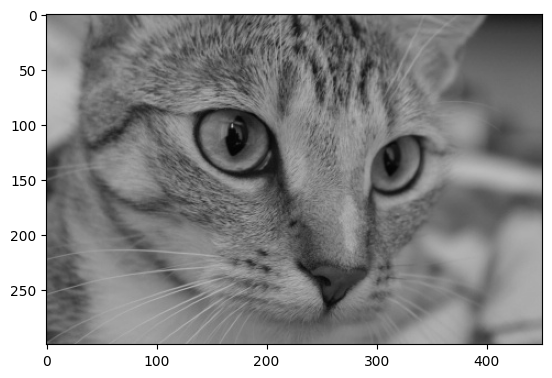

In [3]:
import cv2
from matplotlib import pyplot as plt
img=cv2.imread('samples/cat.jpg')
plt.imshow(img,cmap='gray')


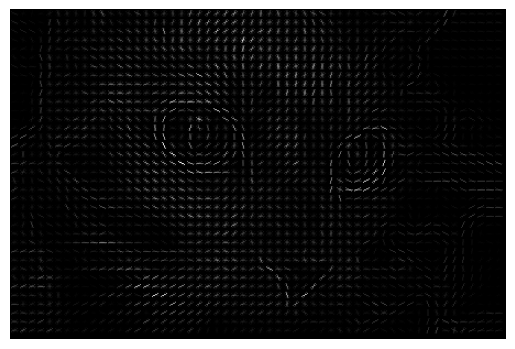

In [25]:
from skimage import color, feature
import matplotlib.pyplot as plt

# Convert to grayscale
# img eka gray walata convert krala thami danna one
gray_img = color.rgb2gray(img)

# Compute HOG
hog_vec, hog_vis = feature.hog(
    gray_img,
    visualize=True,
    block_norm="L2-Hys"
)

plt.imshow(hog_vis, cmap='gray')

# print(hog_vec.shape) hog vec eka thiyenne numpy aray ekka widiyata
plt.axis("off")
plt.show()

In [7]:
!pip install scikit-image


  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.8 MB 2.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.6/12.8 MB 2.8 MB/s eta 0:00:05
   ------- -------------------------------- 2.4/12.8 MB 3.1 MB/s eta 0:00:04
   ---------- ----------------------------- 3.4/12.8 MB 3.5 MB/s eta 0:00:03
   ------------- -------------------------- 4.5/12.8 MB 3.8 MB/s eta 0:00:03
   ------------------ --------------------- 6.0/12.8 MB 4.2 MB/s eta 0:00:02
   ----------------------- ---------------- 7.6/12.8 MB 4.7 MB/s eta 0:00:02
   ----------------------------- ---------- 9.4/12.8 MB 5.2 MB/s eta 0:00:01
   ------------------------------------- -- 12.1/12.8 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 6.0 MB/s eta 0:00:00
   --------------------

In [31]:
import os
import numpy as np

data_path='dataset'

categories=os.listdir(data_path)
print(categories)
labels=np.arange(len(categories))
print(labels)
label_dict=dict(zip(categories,labels))
print(label_dict)

['negative', 'positive']
[0 1]
{'negative': np.int64(0), 'positive': np.int64(1)}


In [43]:
import cv2
data=[]
target=[]
for category in categories:
    imgs_path=os.path.join(data_path,category)
    # print(img_path)
    img_names=os.listdir(imgs_path)
    # print(img_names)
    # print('--------------------------------------------------------------')
    for img_name in img_names:
        try:
            img_path=os.path.join(imgs_path,img_name)
            img=cv2.imread(img_path)
            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            data.append(img)
            target.append(label_dict[category])
        except Exception as e:
            pring(img_path,e)
            

In [45]:
data_new=np.array(data)
target_new=np.array(target)

In [47]:
print(data_new.shape)
print(target_new.shape)

(43252, 62, 47)
(43252,)


In [49]:
np.save('my_data',data_new)
np.save('my_target',target_new)

Imoport Data

In [55]:
import numpy as np
data=np.load('my_data.npy')
target=np.load('my_target.npy')

In [59]:
data.shape


(43252, 62, 47)

In [61]:
from skimage import feature
data_new=np.array([feature.hog(im) for im in data])
print(data_new.shape)

(43252, 1215)


In [63]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data_new,target,test_size=0.1)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(train_data,train_target)

KNeighborsClassifier()

In [67]:
predicted_target=model.predict(test_data)
from sklearn.metrics import accuracy_score
acc=accuracy_score(test_target,predicted_target)
print(acc)

0.9969949144706426


In [69]:
import joblib
joblib.dump(model,'face-detect-my-model.sav')

['face-detect-my-model.sav']

Load model

In [76]:
import joblib

model=joblib.load('face-detect-my-model.sav')


In [187]:
from skimage import feature
import numpy as np

def detect(img,h=62,w=47,slide=8):
    coords=[]
    
    for y in range(0,img.shape[0]-h,slide):
       for x in range(0,img.shape[1]-w,slide):
                patch=img[y:y+h,x:x+w]
                # print
                hog_img=feature.hog(patch)
                label=model.predict([hog_img])
        
                if(label==1):
                    coords.append((x,y,w,h))

    return np.array(coords)



(160, 140, 3)


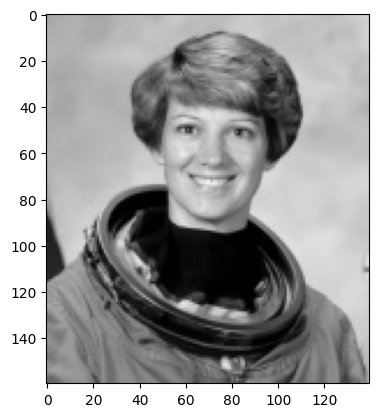

In [175]:
import cv2
from matplotlib import pyplot as plt
test_image=cv2.imread('test_data/test-img-1.jpg')
print(test_image.shape)
plt.imshow(test_image,cmap='gray')

In [176]:
gray=cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
faces=detect(gray)

In [178]:
for x,y,w,h in faces:
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),1)
cv2.imshow('test_image',test_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

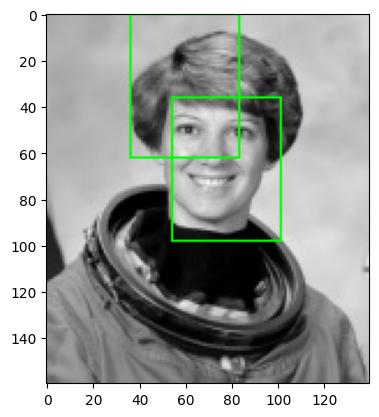

In [181]:
plt.imshow(test_image)

In [189]:
import cv2

source=cv2.VideoCapture(0)

while(True):
    
    ret,img=source.read()
    
    img=cv2.resize(img,(0,0),fx=0.2,fy=0.2)
    
    if(ret==False):
        break
    
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = detect(gray)
    
    for x,y,w,h in faces:

        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)

    cv2.imshow('img',img)
    k=cv2.waitKey(1)
    if(k==27):
        break
        
cv2.destroyAllWindows()
source.release()